In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.shape

(8763, 26)

In [97]:
df.isnull().head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,New_col
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes

,0
Age,int64
Sex,float64
Cholesterol,int64
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64
Previous Heart Problems,int64


In [ ]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')

In [ ]:
import numpy as np

np.mean(df['Heart Rate'])

np.float64(75.02168207234965)

In [ ]:
np.mean(df['Age'])

np.float64(53.70797672030127)

In [ ]:
df.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
df["Sex"] = df["Sex"].map({"Male": 0, "Female": 1})


In [ ]:
df = df.dropna()
df = df.dropna(axis=1)
df = df.fillna('NULL')
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df['New_col']=1
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,New_col
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,1
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,1
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,1
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,1
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,1


In [ ]:
df.sort_values(by=['Age','BMI']).head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,New_col
4463,YBF7973,18,1,237,159/77,85,0,1,0,1,...,173659,18.059471,252,6,7,South Africa,Africa,Southern Hemisphere,0,1
202,LGH0316,18,1,214,179/88,68,0,0,0,0,...,96215,18.314298,129,6,9,Colombia,South America,Northern Hemisphere,1,1
3400,LTG8511,18,0,151,103/103,74,0,1,1,0,...,116932,19.029584,146,7,7,United Kingdom,Europe,Northern Hemisphere,0,1
8501,AJD3264,18,0,332,122/72,85,1,0,1,1,...,162688,19.230764,541,5,8,Australia,Australia,Southern Hemisphere,0,1
2000,WBS4256,18,0,146,131/91,75,1,0,1,0,...,111149,19.403708,611,7,9,Spain,Europe,Southern Hemisphere,0,1


In [ ]:
# Apply lambda to normalize column
const = df['Heart Rate'].mean()
df['Heart Rate'].apply(lambda x : x/const).head(10)

,Heart Rate
0,0.959723
1,1.306289
2,0.959723
3,0.973052
4,1.239642
5,0.639815
6,1.119676
7,1.426254
8,0.906405
9,0.733121


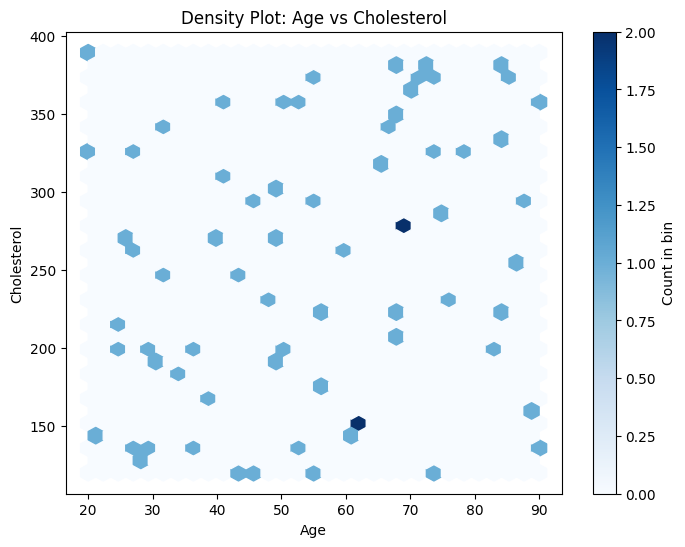

In [91]:
plt.figure(figsize=(8,6))
age = df["Age"][:70]
cholestrol = df["Cholesterol"][:70]

plt.hexbin(age, cholestrol, gridsize=30, cmap="Blues")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Density Plot: Age vs Cholesterol")
plt.colorbar(label="Count in bin")
plt.show()

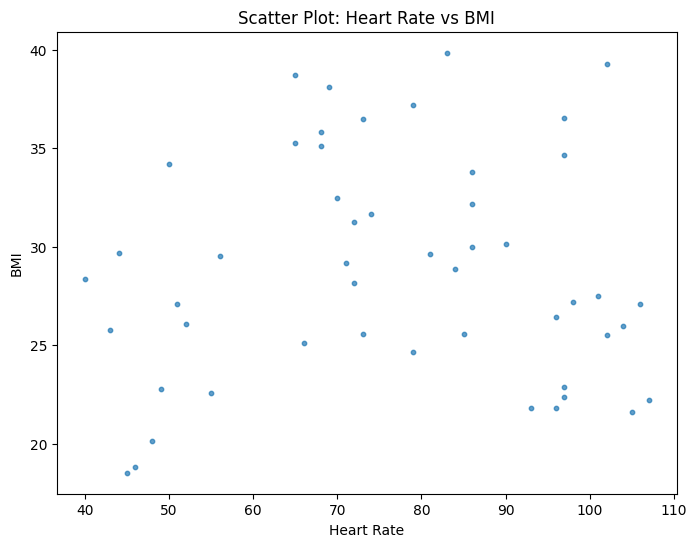

In [84]:
import matplotlib.pyplot as plt

heart = df['Heart Rate'][:50]
bmi = df['BMI'][:50]
plt.figure(figsize=(8,6))
plt.scatter(
    heart,
    bmi,
    alpha=0.7,    # transparency
    s=10          # marker size
)
plt.xlabel("Heart Rate")
plt.ylabel("BMI")
plt.title("Scatter Plot: Heart Rate vs BMI")
plt.show()

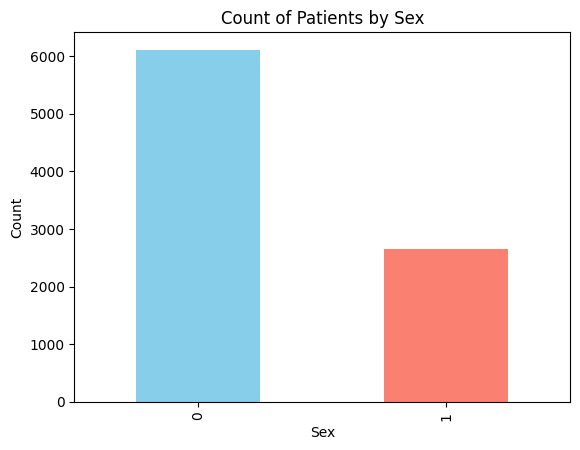

In [85]:
import matplotlib.pyplot as plt

# Bar plot: Count of patients by Sex
df['Sex'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Count of Patients by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

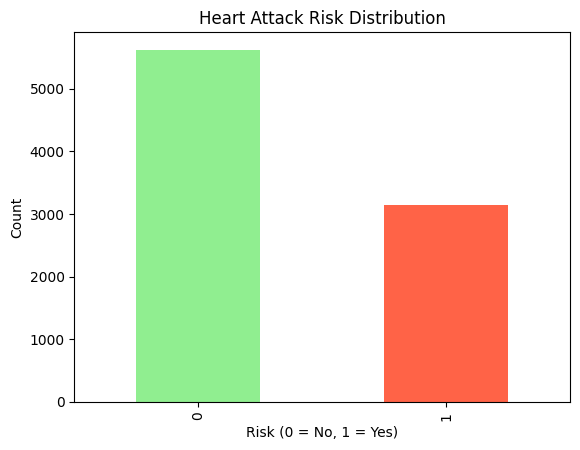

In [86]:
# Bar plot: Heart Attack Risk counts
df['Heart Attack Risk'].value_counts().plot(kind='bar', color=['lightgreen','tomato'])
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Risk (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

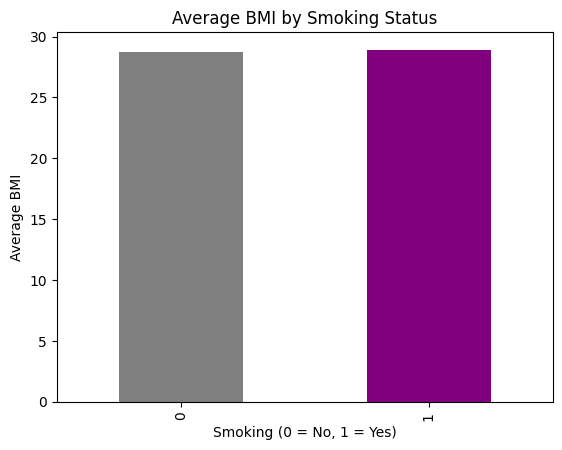

In [87]:
# Bar plot: Average BMI for smokers vs non-smokers
df.groupby('Smoking')['BMI'].mean().plot(kind='bar', color=['gray','purple'])
plt.title("Average BMI by Smoking Status")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Average BMI")
plt.show()

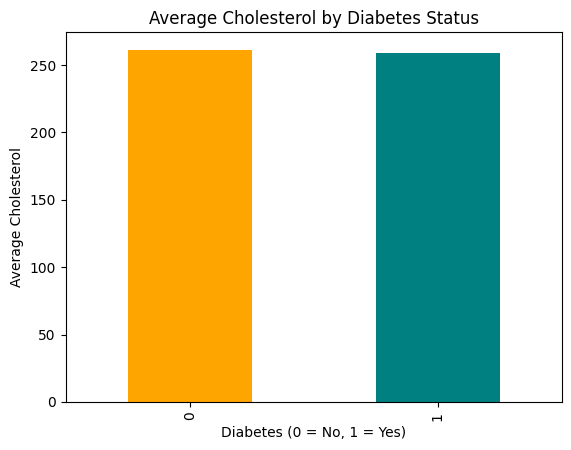

In [88]:
df.groupby('Diabetes')['Cholesterol'].mean().plot(kind='bar', color=['orange','teal'])
plt.title("Average Cholesterol by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Average Cholesterol")
plt.show()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)  # you can tune max_depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [93]:
y_pred_dt = clf.predict(X_test)

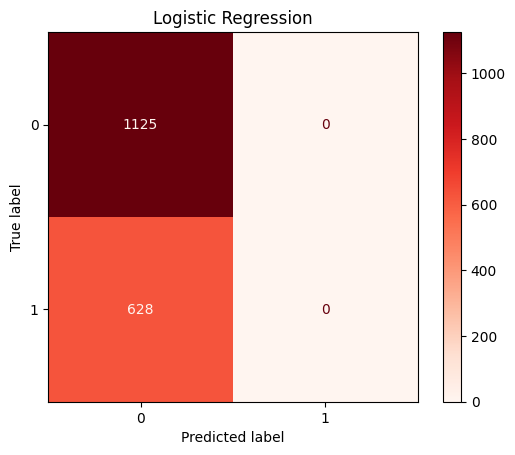

 Accuracy is 0.6417569880205363
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt, cmap='Reds')
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")
print(classification_report(y_test,y_pred_dt))